In [1]:
import numpy as np
import pandas  as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator ,array_to_img, img_to_array, load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


Using TensorFlow backend.


In [2]:
train_path = 'images/train'
val_path = 'images/validation'

In [3]:

train_datagen = ImageDataGenerator( rescale = 1./255,
                                    rotation_range = 40,
                                    width_shift_range = .2,
                                    height_shift_range = .3,
                                    shear_range = .3,
                                    zoom_range = .2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

In [4]:
training_data = train_datagen.flow_from_directory(train_path,
                                 target_size = (48,48),
                                 batch_size=80,
                                 class_mode = 'categorical',
                                 color_mode = 'grayscale')

Found 28821 images belonging to 7 classes.


In [5]:
valid_datagen = ImageDataGenerator( rescale = 1./255)
valid_data = train_datagen.flow_from_directory(val_path,
                                 target_size = (48,48),
                                 batch_size=80,
                                 class_mode = 'categorical',
                                 color_mode = 'grayscale')                                  

Found 7066 images belonging to 7 classes.


In [6]:
valid_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [15]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (48,48,1)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(7, activation = 'softmax')
                                    
    
    
    
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = ['accuracy'])  
        
         

In [19]:
model.fit(training_data,  validation_data = valid_data,  epochs = 10)

Epoch 1/10
6/6 [==============================] - 29s 5s/step - loss: 1.0211 - accuracy: 0.5521 - val_loss: 0.9842 - val_accuracy: 0.5875
Epoch 2/10
6/6 [==============================] - 30s 5s/step - loss: 0.9851 - accuracy: 0.5729 - val_loss: 1.0529 - val_accuracy: 0.5625
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 0.9408 - accuracy: 0.5854 - val_loss: 0.9452 - val_accuracy: 0.5896
Epoch 4/10
6/6 [==============================] - 31s 5s/step - loss: 0.8943 - accuracy: 0.6479 - val_loss: 0.8447 - val_accuracy: 0.6438
Epoch 5/10
6/6 [==============================] - 31s 6s/step - loss: 0.8111 - accuracy: 0.6729 - val_loss: 0.8175 - val_accuracy: 0.6687
Epoch 6/10
6/6 [==============================] - 29s 5s/step - loss: 0.8276 - accuracy: 0.6646 - val_loss: 0.7351 - val_accuracy: 0.6833
Epoch 7/10
6/6 [==============================] - 29s 5s/step - loss: 0.7566 - accuracy: 0.6958 - val_loss: 0.7037 - val_accuracy: 0.7312
Epoch 8/10
6/6 [==================

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('model.h5')

In [11]:
import matplotlib.pyplot as plt

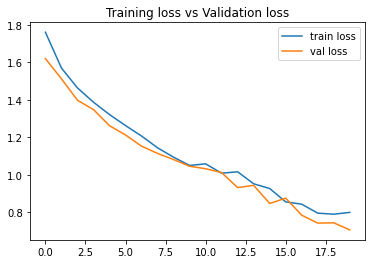

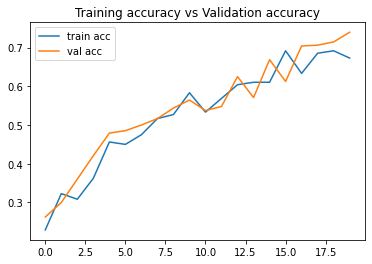

In [12]:
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.title('Training loss vs Validation loss')
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training accuracy vs Validation accuracy')
plt.show()
#plt.savefig('AccVal_acc')